# Categorical Data Lab

### Introduction

In this lesson, we'll work through our machine learning process with categorical data.

### Loading our Data

Let's begin by loading up our data.

In [1]:
import pandas as pd 
# url = "https://raw.githubusercontent.com/jigsawlabs-student/feature-engineering/master/8-cat-vars-lab/imdb_movies.csv"
url = "imdb_movies_nan.csv"
movies_df = pd.read_csv(url, index_col = 0)

This time we have sorted the movies for you.

In [2]:
movies_df[:2]

,title,genre,budget,runtime,year,month,revenue
1108,Pinocchio,Animation,2600000.0,88.0,1940,2,84300000
862,Lolita,Drama,2000000.0,153.0,1962,6,9250000


In [3]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1108 to 357
Data columns (total 7 columns):
title      2000 non-null object
genre      1916 non-null object
budget     1880 non-null float64
runtime    2000 non-null float64
year       2000 non-null int64
month      2000 non-null int64
revenue    2000 non-null int64
dtypes: float64(2), int64(3), object(2)
memory usage: 125.0+ KB


Let's split our data up front.

Assign the revenue column to the variable `y`, and the remaining columns except for title to the variable `X`.

In [4]:
y = movies_df['revenue']

In [5]:
y = movies_df['revenue']
X = movies_df.drop(columns = ['title', 'revenue'])

Ok, now it's time to split our data.

We already have our data sorted, but let's make sure that when we perform the split our data is split with the most recent data in the test set, and the next set of recent data in the validation set.   

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False, test_size = .2)

X_validate, X_test, y_validate, y_test = train_test_split(X_test, y_test, shuffle = False, test_size = .5)

In [7]:
X_train.shape

(1600, 5)

In [8]:
X_validate.shape

(200, 5)

In [9]:
X_test.shape

(200, 5)

### Coercing the Data

Let's take another look at our data.

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1108 to 357
Data columns (total 5 columns):
genre      1916 non-null object
budget     1880 non-null float64
runtime    2000 non-null float64
year       2000 non-null int64
month      2000 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 93.8+ KB


We cannot train the model because we have null values in `genre` and in `budget`.  Let's start with budget.  We'll replace the missing values in the budget column with the mean, and add a `budget_is_na` column that indicates if the value was missing.

In [11]:
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn_pandas import DataFrameMapper

In [12]:
mapper = DataFrameMapper([
    (['budget'], SimpleImputer()),
    (['budget'], MissingIndicator(), {'alias': 'budget_is_na'}),
], df_out = True)

In [13]:
transformed_X = mapper.fit_transform(X)
transformed_X[:2]

,budget,budget_is_na
1108,2600000.0,False
862,2000000.0,False


In [14]:
transformed_X['budget'].isna().sum(), transformed_X['budget_is_na'].sum()

(0, 120)

### Handling Categorical Values

Working with the categorical variables is different.  We don't need to add a new column for the na values, as this can be taken care of with our one hot encoding.  So let's take care of the na values in the genre column by replacing them with the string `na`. 

In [15]:
from sklearn.preprocessing import OneHotEncoder

In [16]:
mapper = DataFrameMapper([
    (['budget'], SimpleImputer()),
    (['budget'], MissingIndicator(), {'alias': 'budget_is_na'}),
    (['genre'], SimpleImputer(fill_value = 'na', strategy = 'constant')),
], df_out = True)

In [17]:
transformed_X = mapper.fit_transform(X)
transformed_X[:2]

,budget,budget_is_na,genre
1108,2600000.0,False,Animation
862,2000000.0,False,Drama


In [18]:
transformed_X['genre'].value_counts()

# Action             483
# Drama              365
# Comedy             359
# Adventure          236
# Animation           93
# na                  84
# Fantasy             80
# Crime               76
# Thriller            73
# Horror              59
# Science Fiction     52
# Romance             40
# Name: genre, dtype: int64

Action             483
Drama              365
Comedy             359
Adventure          236
Animation           93
na                  84
Fantasy             80
Crime               76
Thriller            73
Horror              59
Science Fiction     52
Romance             40
Name: genre, dtype: int64

Ok, now let's add one hot encoding with our genre columns.

In [19]:
mapper = DataFrameMapper([
    (['budget'], SimpleImputer()),
    (['budget'], MissingIndicator(), {'alias': 'budget_is_na'}),
    (['genre'], [SimpleImputer(fill_value = 'na', strategy = 'constant'), OneHotEncoder()]),
], df_out = True)

In [20]:
transformed_X = mapper.fit_transform(X)
transformed_X[:3]

,budget,budget_is_na,genre_x0_Action,genre_x0_Adventure,genre_x0_Animation,genre_x0_Comedy,genre_x0_Crime,genre_x0_Drama,genre_x0_Fantasy,genre_x0_Horror,genre_x0_Romance,genre_x0_Science Fiction,genre_x0_Thriller,genre_x0_na
1108,2600000.0,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
862,2000000.0,False,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1125,31115000.0,False,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Assign our columns except for `title`, `genre`, and `revenue` combined with our `genre_df` to the variable `X`. 

In [23]:
# sorted_movies_df.columns

In [27]:
# selected_df = movies_df[['budget', 'runtime', 'year', 'month', 'budget_is_na']]
# X = pd.concat([selected_df, genre_df], axis = 1)

In [358]:
X[:2]
# 	budget	runtime	year	month	Adventure	Animation	Comedy	Crime	Drama	Fantasy	Horror	Romance	Science Fiction	Thriller	na
# 1108	2600000	88.0	1940	2	0	1	0	0	0	0	0	0	0	0	0
# 862	2000000	153.0	1962	6	0	0	0	0	1	0	0	0	0	0	0

,genre,budget,runtime,year,month
1108,Animation,2600000.0,88.0,1940,2
862,Drama,2000000.0,153.0,1962,6


### Handling the Rest

Now that we've taken care of our genre and budget columns, let's see if the rest of our columns are ready to add in there. 

In [359]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1108 to 357
Data columns (total 5 columns):
genre      1916 non-null object
budget     1880 non-null float64
runtime    2000 non-null float64
year       2000 non-null int64
month      2000 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 93.8+ KB


Runtime, year and month each have only non-null values.  They are also already numeric.  So let's have our mapper include them.

In [28]:
mapper = DataFrameMapper([
    (['budget'], SimpleImputer()),
    (['budget'], MissingIndicator(), {'alias': 'budget_is_na'}),
    (['genre'], [SimpleImputer(fill_value = 'na', strategy = 'constant'), OneHotEncoder()]),
], df_out = True, default = None)

In [29]:
transformed_X = mapper.fit_transform(X)


In [30]:
transformed_X.columns

Index(['budget', 'budget_is_na', 'genre_x0_Action', 'genre_x0_Adventure',
       'genre_x0_Animation', 'genre_x0_Comedy', 'genre_x0_Crime',
       'genre_x0_Drama', 'genre_x0_Fantasy', 'genre_x0_Horror',
       'genre_x0_Romance', 'genre_x0_Science Fiction', 'genre_x0_Thriller',
       'genre_x0_na', 'runtime', 'year', 'month'],
      dtype='object')

In [31]:
transformed_X[:3]

# budget	budget_is_na	genre_x0_Action	genre_x0_Adventure	genre_x0_Animation	genre_x0_Comedy	genre_x0_Crime	genre_x0_Drama	genre_x0_Fantasy	genre_x0_Horror	genre_x0_Romance	genre_x0_Science Fiction	genre_x0_Thriller	genre_x0_na	runtime	year	month
# 1108	2600000.0	False	0.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	88.0	1940.0	2.0
# 862	2000000.0	False	0.0	0.0	0.0	0.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	153.0	1962.0	6.0
# 1125	31115000.0	False	0.0	0.0	0.0	0.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	248.0	1963.0	6.0


,budget,budget_is_na,genre_x0_Action,genre_x0_Adventure,genre_x0_Animation,genre_x0_Comedy,genre_x0_Crime,genre_x0_Drama,genre_x0_Fantasy,genre_x0_Horror,genre_x0_Romance,genre_x0_Science Fiction,genre_x0_Thriller,genre_x0_na,runtime,year,month
1108,2600000.0,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,1940.0,2.0
862,2000000.0,False,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,153.0,1962.0,6.0
1125,31115000.0,False,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,248.0,1963.0,6.0


### Training the model

Ok, copy our mapper below.

In [364]:
mapper = DataFrameMapper([
    (['budget'], SimpleImputer()),
    (['budget'], MissingIndicator(), {'alias': 'budget_is_na'}),
    (['genre'], [SimpleImputer(fill_value = 'na', strategy = 'constant'), OneHotEncoder()]),
], df_out = True, default = None)

And then, we can apply the mapping to both our training and validation sets, train and score the model.

In [365]:
X_train_coerced = mapper.fit_transform(X_train)

In [366]:
X_validate_coerced = mapper.transform(X_validate)
X_validate_coerced[:2]

,budget,budget_is_na,genre_x0_Action,genre_x0_Adventure,genre_x0_Animation,genre_x0_Comedy,genre_x0_Crime,genre_x0_Drama,genre_x0_Fantasy,genre_x0_Horror,genre_x0_Romance,genre_x0_Science Fiction,genre_x0_Thriller,genre_x0_na,runtime,year,month
597,70000000.0,False,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,88.0,2012.0,1.0
800,58000000.0,False,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,125.0,2012.0,1.0


In [367]:
from sklearn.linear_model import LinearRegression

In [368]:
model = LinearRegression()
model.fit(X_train_coerced, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [369]:
model.score(X_validate_coerced, y_validate)
# 0.537861413573713

0.5301554092507477

### Feature Selection

Next we can move onto looking at the importance of our features.

In [370]:
from eli5.sklearn import PermutationImportance
import eli5

perm = PermutationImportance(model).fit(X_validate_coerced, y_validate)
exp_df = eli5.explain_weights_df(perm, feature_names = list(X_train_coerced.columns))
exp_df[:15]

Let's try validating again, but this time with just the top five most important features.

In [373]:
exp_df['feature'].values[:4]

array(['budget', 'budget_is_na', 'runtime', 'genre_x0_Animation'],
      dtype=object)

### Continuing Feature Engineering

In [374]:
top_features = X_train[['budget', 'runtime']]

Ok, now that we have identified our top features, we can focus our time on improving these features.  Let's start by exploring the budget and runtime, by plotting them in matplotlib.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c29cd52d0>,
      dtype=object)

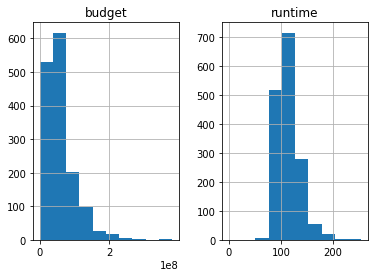

In [375]:
top_features.hist()

And then let's describe these features.

In [376]:
top_features.describe()

,budget,runtime
count,1.497000e+03,1600.000000
mean,6.022669e+07,113.091875
std,4.048444e+07,21.658927
min,2.500000e+01,0.000000
25%,3.200000e+07,98.000000
50%,5.000000e+07,109.500000
75%,7.500000e+07,124.000000
max,3.800000e+08,254.000000


Ok. it looks like both budget and runtime has some suspicious values.  View the lowest values of budget using `value_counts`.

In [377]:
bottom_budgets = top_features['budget'].value_counts().sort_index()
bottom_budgets.iloc[:5]

25.0        1
28.0        1
30.0        1
110.0       1
500000.0    1
Name: budget, dtype: int64

And let's do the same for `runtime`.

In [378]:
bottom_runtimes = top_features['runtime'].value_counts().sort_index()
bottom_runtimes.iloc[:5]

0.0     1
63.0    1
72.0    1
74.0    1
75.0    2
Name: runtime, dtype: int64

Ok, so let's replace set a threshold for under 100,000 for budget, and under 40 minutes for runtime.

In [34]:
from sklearn_pandas import FunctionTransformer
import numpy as np
def impute_less_than_100_k(X):
    return np.where(X < 100000, np.nan, X)



In [37]:
def impute_less_than_40(X):
    return np.where(X < 40, np.nan, X)

mapper = DataFrameMapper([
    (['budget'], [FunctionTransformer(impute_less_than_100_k), SimpleImputer()]),
    (['budget'], MissingIndicator(), {'alias': 'budget_is_na'}),
    (['genre'], [SimpleImputer(fill_value = 'na', strategy = 'constant'), OneHotEncoder()]),
    (['runtime'], [FunctionTransformer(impute_less_than_40), SimpleImputer()]),
], df_out = True, default = None)

In [38]:
X_train_coerced = mapper.fit_transform(X_train)

In [39]:
(X_train_coerced['budget'] < 100000).sum()
# 0

0

In [394]:
# X_train_coerced['budget'].value_counts().sort_index()

In [401]:
(X_train_coerced['runtime'] < 40).sum()
# 0

0

* Coercing the target

Now let's drop our 0 values from `movies_df`.

In [316]:
pruned_movies_df = movies_df[~(movies_df['revenue'] == 0)]

### Wrapping Up

Select our X and y columns.

In [317]:
y = pruned_movies_df['revenue']
X = pruned_movies_df.drop(columns = ['title', 'revenue'])

In [319]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False, test_size = .2)

X_validate, X_test, y_validate, y_test = train_test_split(X_test, y_test, shuffle = False, test_size = .5)

Copy our mapper code.

In [409]:
from sklearn_pandas import FunctionTransformer
import numpy as np
def impute_less_than_100_k(X):
    return np.where(X < 100000, np.nan, X)

def impute_less_than_40(X):
    return np.where(X < 40, np.nan, X)

mapper = DataFrameMapper([
    (['budget'], SimpleImputer()),
    (['budget'], MissingIndicator(), {'alias': 'budget_is_na'}),
    (['genre'], [SimpleImputer(fill_value = 'na', strategy = 'constant'), OneHotEncoder()]),
], df_out = True, default = None)

Fit and transform our train data, and transform our validate and test data.

In [405]:
X_train_coerced = mapper.fit_transform(X_train)
X_validate_coerced = mapper.fit_transform(X_validate)
X_test_coerced = mapper.fit_transform(X_test)

In [406]:
y_train.isna().sum()

0

In [407]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_coerced, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [408]:
model.score(X_validate_coerced, y_validate)

0.5292171950462577

In [414]:
from eli5.sklearn import PermutationImportance
import eli5

perm = PermutationImportance(model).fit(X_validate_coerced, y_validate)
exp_df = eli5.explain_weights_df(perm, feature_names = list(X_train_coerced.columns))
exp_df[:4]

,feature,weight,std
0,budget,0.757332,0.025831
1,budget_is_na,0.035654,0.010210
2,runtime,0.034215,0.003914
3,genre_x0_Animation,0.029332,0.003169


In [416]:
selected_cols = exp_df[:4].feature.values

In [417]:
model = LinearRegression()
model.fit(X_train_coerced[selected_cols], y_train)

model.score(X_test_coerced[selected_cols], y_test)

0.5299022656678686

### Resources

* [Sklearn Function Transformers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_function_transformer.html)

* [Python Data Science ](https://python-data-science.readthedocs.io/en/latest/preprocess.html)